## Project Proposal  
### by Yidan Sun
Introduction: Use Kaggle LOL 15 minutes match Diamond data (50000 in total) to train different classifiers(eliminate the less weighted features), analyze features and implement the final strategy that has the best accuracy.

In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

from sklearn . linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier


from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df=pd.read_csv('MatchTimelinesFirst15.csv')
df_origin_blue=df.drop(columns=['blueDragonKills','redDragonKills','matchId','blue_win','redGold','redMinionsKilled','redJungleMinionsKilled','redAvgLevel','redChampKills','redHeraldKills','redTowersDestroyed'])
df_origin_red=df.drop(columns=['blueDragonKills','redDragonKills','matchId','blue_win','blueGold','blueMinionsKilled','blueJungleMinionsKilled','blueAvgLevel','blueChampKills','blueHeraldKills','blueTowersDestroyed'])

In [3]:
24062/48651

0.4945838728905881

In [4]:
df.head()

,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,3493250918,0,24575,349,89,8.6,25856,346,80,9.2,6,1,0,1,12,2,0,1
1,3464936341,0,27210,290,36,9.0,28765,294,92,9.4,20,0,0,0,19,2,0,0
2,3428425921,1,32048,346,92,9.4,25305,293,84,9.4,17,3,0,0,11,0,0,4
3,3428347390,0,20261,223,60,8.2,30429,356,107,9.4,7,0,0,3,16,3,0,0
4,3428350940,1,30217,376,110,9.8,23889,334,60,8.8,16,3,0,0,8,0,0,2


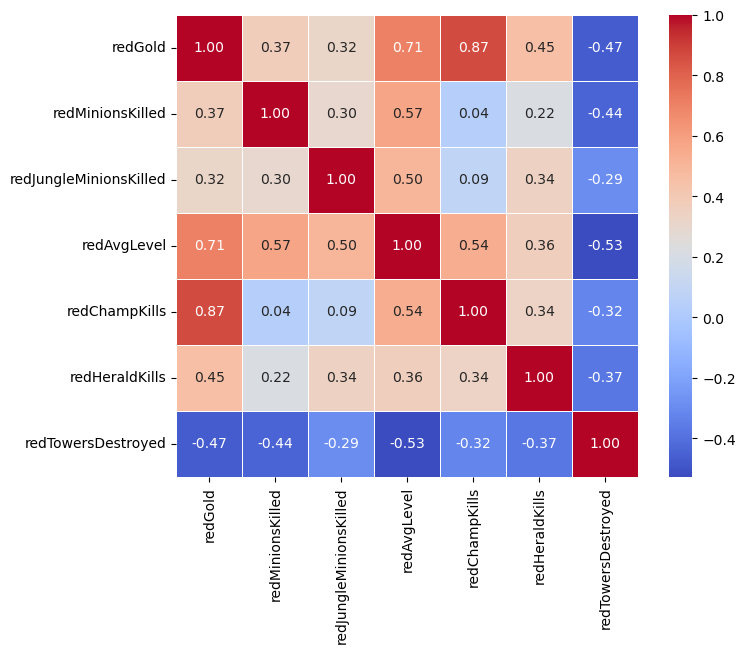

In [5]:
df_origin_red
correlation_matrix = df_origin_red.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.yticks(rotation=0)
# Show the plot
plt.show()

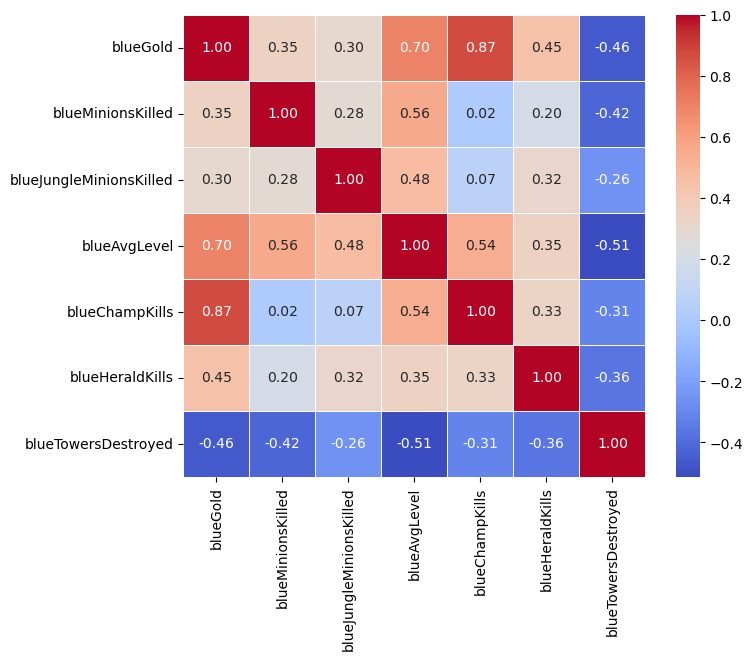

In [6]:
df_origin_blue
correlation_matrix = df_origin_blue.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.yticks(rotation=0)
# Show the plot
plt.show()

In [7]:
#Total No. of Games =48651 
#Blue Team wins: 24589 (round 50%)
df['blue_win'].describe()

count    48651.000000
mean         0.505416
std          0.499976
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: blue_win, dtype: float64

In [8]:
df_blue=df[df['blue_win']==1]
df_red=df[df['blue_win']==0]

## KNN=4 (51.90%) 

In [9]:
X = df[[ 'blueChampKills', 'blueHeraldKills','blueTowersDestroyed']].values
Y = df['blue_win'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

scaler = StandardScaler (). fit (X_train)
X_train = scaler . transform (X_train)
knn_classifier = KNeighborsClassifier ( n_neighbors =4)
knn_classifier . fit (X_train,Y_train)

prediction = knn_classifier.predict ( X_test)
acc=accuracy_score(Y_test,prediction)
cf=confusion_matrix(Y_test,prediction)

print(acc)
print(cf)

0.5190331332730412
[[  260 11696]
 [    4 12366]]


In [10]:
KNN_TPR=round(12366*100/(12366+4),2)
KNN_TNR=round(260*100/(260+11696),2)
print(f'KNN TPR:{KNN_TPR}%')
print(f'KNN TNR:{KNN_TNR}%')

KNN TPR:99.97%
KNN TNR:2.17%


In [11]:
df.insert(4,'KNN',0)

In [12]:
prediction = knn_classifier.predict (X)
df['KNN']=prediction

## Logistic Regression(50.85%)

In [13]:
X = df[['blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'blueChampKills','blueHeraldKills', 'blueTowersDestroyed']].values
Y = df['blue_win'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

scaler = StandardScaler ()
scaler .fit(X_train)
X_train = scaler .transform (X_train)

log_reg_classifier = LogisticRegression ()
log_reg_classifier . fit (X_train,Y_train)

predicted = log_reg_classifier.predict(X_test)
acc=accuracy_score(Y_test,predicted)
cf=confusion_matrix(Y_test,predicted)

print(acc)
print(cf)

0.5085094137959385
[[    0 11956]
 [    0 12370]]


In [14]:
LOG_TPR=0
LOG_TNR=100
print(f'Logistics TPR:{LOG_TPR}%')
print(f'Logistics TNR:{LOG_TNR}%')

Logistics TPR:0%
Logistics TNR:100%


## Linear Discriminant Analysis(75.94%)

In [15]:
X = df[[ 'blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel','blueChampKills', 'blueHeraldKills', 'blueDragonKills', 'blueTowersDestroyed']].values
Y = df['blue_win'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_test=np.asarray(X_test)

lda_classifier = LDA( )
lda_classifier.fit(X_train, Y_train)
prediction = lda_classifier.predict(X_test)


accuracy = lda_classifier.score (X_test, Y_test)
cf=confusion_matrix(Y_test,prediction)

print(accuracy)
print(cf)


0.7593521335196909
[[9027 2929]
 [2925 9445]]


In [16]:
#TPR and TNR
LDA_TPR= round(9445*100/(2925+9445),2)
LDA_TNR=round(9027*100/(9027+2929),2)
print(f'LinearDiscriminant Analysis TPR:{LDA_TPR}%')
print(f'LinearDiscriminant Analysis TNR:{LDA_TNR}%')

LinearDiscriminant Analysis TPR:76.35%
LinearDiscriminant Analysis TNR:75.5%


## Quadratic Discriminant Analysis(49.15%)

In [17]:
X = df[['blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel', 'blueChampKills', 'blueHeraldKills', 'blueDragonKills', 'blueTowersDestroyed']].values
Y = df['blue_win'].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

qda_classifier = QDA()
qda_classifier.fit(X_scaled_train, Y_train)

predicted = qda_classifier.predict(X_scaled_test)


accuracy = qda_classifier.score(X_test, Y_test)
cf=confusion_matrix(predicted,Y_test)

print(accuracy)
print(cf)

0.4914905862040615
[[11956 12370]
 [    0     0]]


D:\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
D:\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\anaconda\Lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\anaconda\Lib\site-packages\sklearn\di

In [18]:
#TPR and TNR
QDA_TPR= 0
QDA_TNR=round(11956*100/(11956+12370),2)
print(f'Quadratic Discriminant Analysis TPR:{QDA_TPR}%')
print(f'Quadratic Discriminant Analysis TNR:{QDA_TNR}%')

Quadratic Discriminant Analysis TPR:0%
Quadratic Discriminant Analysis TNR:49.15%


## Naive Bayes(75.90%)

In [19]:
#BlueJungleMinionsKilled has little importance in improving accuracy

X = df[['blueGold', 'blueMinionsKilled', 'blueAvgLevel', 'blueChampKills', 'blueHeraldKills', 'blueDragonKills','blueTowersDestroyed']].values
Y = df['blue_win'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
NB_classifier = GaussianNB (). fit (X_train, Y_train)
prediction = NB_classifier .predict (X_test)

accuracy=accuracy_score(Y_test,prediction)
cf=confusion_matrix(Y_test,prediction)
print(accuracy)
print(cf)

0.7590232672860314
[[8824 3132]
 [2730 9640]]


In [20]:
#TPR and TNR
NB_TPR= round(9640*100/(2730+9640),2)
NB_TNR=round(8823*100/(8824+3132),2)
print(f'Naive Bayes TPR:{NB_TPR}%')
print(f'Naive Bayes TNR:{NB_TNR}%')

Naive Bayes TPR:77.93%
Naive Bayes TNR:73.8%


## Decision Tree(67.49%)

In [21]:
#BlueJungleMinionsKilled, BlueAvgLevel has little importance in improving accuracy

X = df[['blueGold', 'blueMinionsKilled', 'blueChampKills', 'blueHeraldKills', 'blueDragonKills', 'blueTowersDestroyed']].values
Y = df['blue_win'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

clf = tree . DecisionTreeClassifier( criterion = 'entropy')
clf = clf .fit(X_train,Y_train)
prediction = clf .predict (X_test)

print(accuracy_score(Y_test,prediction))
print(confusion_matrix(Y_test,prediction))

0.674463536956343
[[8047 3909]
 [4010 8360]]


In [22]:
#TPR and TNR
DC_TPR= round(8363*100/(8363+4007),2)
DC_TNR=round(8070*100/(8070+3886),2)
print(f'Decision Tree TPR:{DC_TPR}%')
print(f'Decision Tree TNR:{DC_TNR}%')

Decision Tree TPR:67.61%
Decision Tree TNR:67.5%


## Choosing Linear Discriminant Analysis

In [23]:
X = df[[ 'blueGold', 'blueMinionsKilled', 'blueJungleMinionsKilled', 'blueAvgLevel','blueChampKills', 'blueHeraldKills', 'blueDragonKills', 'blueTowersDestroyed']].values
Y = df['blue_win'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_test=np.asarray(X_test)

lda_classifier = LDA( )
lda_classifier.fit(X_train, Y_train)
prediction = lda_classifier.predict(X_test)


accuracy = lda_classifier.score (X_test, Y_test)
cf=confusion_matrix(Y_test,prediction)

print(accuracy)
print(cf)

0.7593521335196909
[[9027 2929]
 [2925 9445]]


In [24]:
#Scale the new instance
new_instance= scaler.transform(X)
predicted= lda_classifier.predict(new_instance)
acc=accuracy_score(Y,predicted)
print(acc)

0.759079977801073


In [25]:
df.insert(2, 'LDA_Predict', predicted)

## Choosing Naive Bayes

In [26]:
X = df[['blueGold', 'blueMinionsKilled', 'blueAvgLevel', 'blueChampKills', 'blueHeraldKills', 'blueDragonKills','blueTowersDestroyed']].values
Y = df['blue_win'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
NB_classifier = GaussianNB (). fit (X_train, Y_train)
prediction = NB_classifier .predict (X_test)

accuracy=accuracy_score(Y_test,prediction)
cf=confusion_matrix(Y_test,prediction)
print(accuracy)
print(cf)

0.7590232672860314
[[8824 3132]
 [2730 9640]]


In [27]:
# TPR and TNR
NB_TPR= 9640/(2730+9640)
NB_TNR=8823/(8824+3132)
print(NB_TPR,NB_TNR)

0.7793047696038804 0.7379558380729341


In [28]:
predicted= NB_classifier .predict(X)
acc=accuracy_score(Y,predicted)
print(acc)

0.7582989044418409


In [29]:
df.insert(3, 'NB_Predict', predicted)

In [30]:
#Try looking at the table where LDA value is different from True Value
df_dif_LDA=df[df['LDA_Predict'] != df['blue_win']]
df_dif_LDA['blueAvgLevel'].describe()

count    11721.000000
mean         9.187680
std          0.298663
min          7.600000
25%          9.000000
50%          9.200000
75%          9.400000
max         10.400000
Name: blueAvgLevel, dtype: float64

In [31]:
df_dif_LDA=df_dif_LDA.reset_index(drop=True)

In [32]:
#Table View
df_dif_LDA

,matchId,blue_win,LDA_Predict,NB_Predict,blueGold,blueMinionsKilled,KNN,blueJungleMinionsKilled,blueAvgLevel,redGold,...,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,3494458885,1,0,1,25470,362,1,82,9.2,22856,...,86,8.8,9,1,0,0,7,1,0,0
1,3463280042,0,1,1,28946,367,1,65,9.2,26528,...,63,8.8,15,2,0,1,14,1,0,1
2,3462733928,1,0,0,26079,302,1,106,9.0,27275,...,91,9.4,9,1,0,1,10,2,0,1
3,3486983506,0,1,1,26523,338,1,99,9.2,27328,...,104,9.4,9,1,0,0,11,2,0,1
4,3501065091,1,0,0,26300,399,1,67,9.0,22318,...,69,8.8,9,0,0,0,5,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11716,3494811387,0,1,1,26927,349,1,80,9.2,26774,...,79,9.2,12,3,0,0,11,0,0,1
11717,3472847472,0,1,1,27555,324,1,117,9.6,25433,...,84,9.2,12,1,0,0,12,2,0,2
11718,3478150309,0,1,1,27872,386,1,92,9.4,24170,...,81,9.2,11,2,0,0,8,1,0,1
11719,3475687814,0,1,0,26971,313,1,88,9.4,27625,...,92,9.0,11,2,0,2,11,1,0,1


## Choosing Random Forest

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, y_pred)
cf=confusion_matrix(Y_test, y_pred)
print("Accuracy:", accuracy)
print(cf)

Accuracy: 0.7330428348269341
[[8834 3122]
 [3372 8998]]


In [34]:
TNR_RF=8834/(8834+3122)
TPR_RF=8998/(8998+3372)
print(TNR_RF)
print(TPR_RF)

0.7388758782201406
0.7274050121261115


## Some Analysis in data insights

In [35]:
df.groupby(['blue_win','blueHeraldKills']).size()

blue_win  blueHeraldKills
0         0                   8317
          1                  10007
          2                   4674
          3                   1058
          4                      6
1         0                   2422
          1                   8013
          2                   9010
          3                   5120
          4                     24
dtype: int64

In [36]:
df.groupby(['blue_win','redHeraldKills']).size()

blue_win  redHeraldKills
0         0                 2405
          1                 7946
          2                 8931
          3                 4759
          4                   21
1         0                 8864
          1                 9989
          2                 4746
          3                  987
          4                    3
dtype: int64

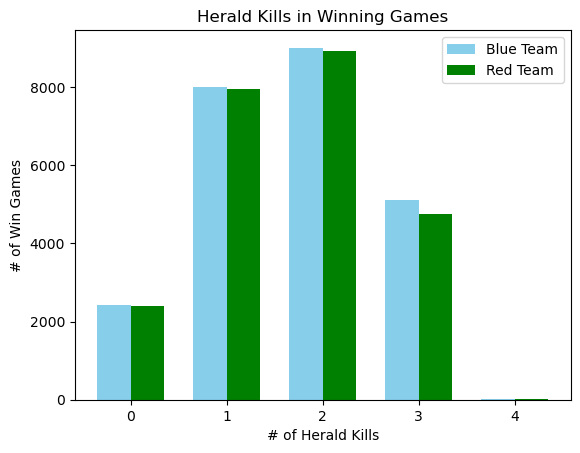

In [37]:
x = [0, 1, 2, 3, 4]
y1=[2422,8013,9010,5120,24]
y2=[2405,7946,8931,4759,21]

# Set the width of the bars
bar_width = 0.35

# Create a double-column bar plot
plt.bar(np.array(x) - bar_width/2, y1, bar_width, label='Blue Team', color='skyblue')
plt.bar(np.array(x) + bar_width/2, y2, bar_width, label='Red Team', color='green')

# Set plot labels
plt.xlabel('# of Herald Kills')
plt.ylabel('# of Win Games')
plt.title('Herald Kills in Winning Games')
plt.legend()

# Show the plot
plt.show()


In [38]:
df.groupby(['blue_win','blueTowersDestroyed']).size()

blue_win  blueTowersDestroyed
0         0                       7439
          1                       9071
          2                       4711
          3                       1774
          4                        585
          5                        222
          6                        124
          7                         83
          8                         26
          9                         21
          10                         3
          11                         3
1         0                      16668
          1                       6491
          2                       1226
          3                        178
          4                         24
          5                          2
dtype: int64

In [39]:
df.groupby(['blue_win','redTowersDestroyed']).size()

blue_win  redTowersDestroyed
0         0                     15218
          1                      7081
          2                      1488
          3                       237
          4                        35
          5                         2
          6                         1
1         0                      6784
          1                      9065
          2                      5299
          3                      2149
          4                       708
          5                       272
          6                       146
          7                        86
          8                        48
          9                        28
          10                        4
dtype: int64

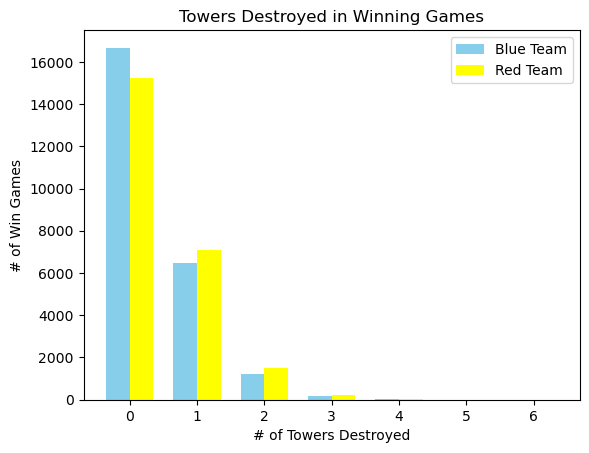

In [40]:
x = [0,1,2,3, 4,5,6]
y1=[16668,6491,1226,178,24,2,0]
y2=[15218,7081,1488,237,35,2,1]

# Set the width of the bars
bar_width = 0.35

# Create a double-column bar plot
plt.bar(np.array(x) - bar_width/2, y1, bar_width, label='Blue Team', color='skyblue')
plt.bar(np.array(x) + bar_width/2, y2, bar_width, label='Red Team', color='yellow')

# Set plot labels
plt.xlabel('# of Towers Destroyed')
plt.ylabel('# of Win Games')
plt.title('Towers Destroyed in Winning Games')
plt.legend()

# Show the plot
plt.show()

## Optimize Blue Team Win(blue_win=1)

In [41]:
df[df['blue_win']==1].groupby(['blue_win','blueHeraldKills']).size()

blue_win  blueHeraldKills
1         0                  2422
          1                  8013
          2                  9010
          3                  5120
          4                    24
dtype: int64

In [42]:
#if blue_Herald<=2, blue has higher probability of win
df_dif_LDA[df_dif_LDA['blue_win']==1].groupby(['blue_win','blueHeraldKills']).size()

blue_win  blueHeraldKills
1         0                  1739
          1                  2932
          2                  1052
          3                    74
dtype: int64

In [43]:
df[df['blue_win']==1].groupby(['blue_win','blueTowersDestroyed']).size()

blue_win  blueTowersDestroyed
1         0                      16668
          1                       6491
          2                       1226
          3                        178
          4                         24
          5                          2
dtype: int64

In [44]:
#blueTowerDestroyed >=1 blue more possible to win.
df_dif_LDA[df_dif_LDA['blue_win']==1].groupby(['blue_win','blueTowersDestroyed']).size()

blue_win  blueTowersDestroyed
1         0                      2271
          1                      2530
          2                       821
          3                       149
          4                        24
          5                         2
dtype: int64

## Optimize Red Team Win (blue_win=0)

with 0/1 herald is not enough for red_team to win, but if red herald kills>=2, higher probability to win

In [45]:
df[df['blue_win']==0].groupby(['blue_win','redHeraldKills']).size()

blue_win  redHeraldKills
0         0                 2405
          1                 7946
          2                 8931
          3                 4759
          4                   21
dtype: int64

majority of red win will be when red herald kills <=1

In [46]:
df_dif_LDA[df_dif_LDA['blue_win']==0].groupby(['blue_win','redHeraldKills']).size( )

blue_win  redHeraldKills
0         0                 1554
          1                 2840
          2                 1367
          3                  163
dtype: int64

No obvious influence on win/loss

In [47]:
df_dif_LDA[df_dif_LDA['blue_win']==0].groupby(['blue_win','redChampKills']).size()

blue_win  redChampKills
0         0                  2
          1                  4
          2                 11
          3                 53
          4                 97
          5                175
          6                306
          7                424
          8                471
          9                559
          10               585
          11               614
          12               592
          13               498
          14               415
          15               348
          16               236
          17               176
          18               117
          19                85
          20                71
          21                38
          22                22
          23                14
          24                 4
          25                 4
          26                 2
          28                 1
dtype: int64

Important factor:  redTowersDestroyed>=2 , more inclined to lose; redTowerDestroyed=0, inclined to win

In [48]:
df[(df['redTowersDestroyed']==0)|(df['redHeraldKills']>=2)]['blue_win'].value_counts()

blue_win
0    19179
1     9963
Name: count, dtype: int64

In [49]:
df[df['blue_win']==0].groupby(['blue_win','redTowersDestroyed']).size()

blue_win  redTowersDestroyed
0         0                     15218
          1                      7081
          2                      1488
          3                       237
          4                        35
          5                         2
          6                         1
dtype: int64

In [50]:
df_dif_LDA[df_dif_LDA['blue_win']==0].groupby(['blue_win','redTowersDestroyed']).size()

blue_win  redTowersDestroyed
0         0                     1752
          1                     2845
          2                     1078
          3                      213
          4                       33
          5                        2
          6                        1
dtype: int64

In [51]:
df_dif_LDA[df_dif_LDA['blue_win']==1]['redHeraldKills'].describe()

count    5797.000000
mean        1.562705
std         0.839055
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: redHeraldKills, dtype: float64

## Strategy 0 

Combining LDA + NB

In [52]:
df.insert(5,'Strategy 0',0)

In [53]:
same=0
diff=0
correct_guess=0
i=0
for elem in df['LDA_Predict']:
    if elem==df.loc[i,'NB_Predict']:
        same+=1
        if elem==df.loc[i,'blue_win']:
            correct_guess+=1
    else:
        diff+=1
    i+=1
count=diff+same
print(same/count)
print(correct_guess/count)
print(count)

#The accuracy of combining two strategy fails. 73.43% accuracy
#Strategy: if they both have the same signal in LDA and NB, then take it, compare to the real label-blue_win. 

0.9511212513617398
0.7342500668023267
48651


In [54]:
import random

i=0
for elem in df['LDA_Predict']:
    if elem==df.loc[i,'NB_Predict']:
        df.loc[i,'Strategy 0']==elem
    else:
        df.loc[i,'Strategy 0']=np.random.choice([df.loc[i,'NB_Predict'],df.loc[i,'LDA_Predict']])
    i+=1

In [55]:
a=df['blue_win']
b=df['Strategy 0']
acc=accuracy_score(a,b)
cf=confusion_matrix(a,b)
print(acc)
print(cf)

0.49400834515220654
[[23456   606]
 [24011   578]]


In [56]:
S0_TPR=round(597*100/(597+23992),2)
S0_TNR=round(23469*100/(23469+593),2)
print(f'Strategy 0 TPR:{S0_TPR}%')
print(f'Strategy 0 TNR:{S0_TNR}%')

Strategy 0 TPR:2.43%
Strategy 0 TNR:97.54%


In [57]:
df

,matchId,blue_win,LDA_Predict,NB_Predict,blueGold,Strategy 0,blueMinionsKilled,KNN,blueJungleMinionsKilled,blueAvgLevel,...,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,3493250918,0,0,0,24575,0,349,1,89,8.6,...,80,9.2,6,1,0,1,12,2,0,1
1,3464936341,0,0,1,27210,1,290,1,36,9.0,...,92,9.4,20,0,0,0,19,2,0,0
2,3428425921,1,1,1,32048,0,346,1,92,9.4,...,84,9.4,17,3,0,0,11,0,0,4
3,3428347390,0,0,0,20261,0,223,1,60,8.2,...,107,9.4,7,0,0,3,16,3,0,0
4,3428350940,1,1,1,30217,0,376,1,110,9.8,...,60,8.8,16,3,0,0,8,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,3475682007,0,1,0,27013,1,338,1,61,9.0,...,77,9.6,14,2,0,2,21,0,0,0
48647,3500987969,1,1,1,25376,0,350,1,91,9.0,...,87,9.4,7,2,0,0,5,1,0,1
48648,3496592883,0,0,0,25456,0,308,1,92,9.0,...,96,9.6,8,0,0,2,17,3,0,1
48649,3491705900,1,1,1,27033,0,335,1,85,9.4,...,64,8.8,14,2,0,0,12,0,0,0


## Strategy I

According to the stats data from table(LDA wrongly predicted) to find the pattern and implement

In [58]:
df.insert(6,'Strategy I',0)

In [59]:
i=0
for e in df['LDA_Predict']:
    if e==0:     
        if (df.loc[i,'redTowersDestroyed']==0) | (df.loc[i,'redHeraldKills']>=2):
            df.loc[i,'Strategy I']=1
        else:
            df.loc[i,'Strategy I']=0
    elif e==1:
        if (df.loc[i,'blueTowersDestroyed']<1) | (df.loc[i,'blueHeraldKills']>=2):
            df.loc[i,'Strategy I']=0
        else:
            df.loc[i,'Strategy I']=1
    i+=1

In [60]:
# Calculate Accuracy and Confusion Matrix
a=df['blue_win']
b=df['Strategy I']
acc=accuracy_score(a,b)
cf=confusion_matrix(a,b)
print(acc)
print(cf)

0.26858646276541076
[[ 6727 17335]
 [18249  6340]]


In [61]:
S1_TPR=round(6340*100/(6340+18249),2)
S1_TNR=round(6727*100/(6727+17335),2)
print(f'Strategy I TPR:{S1_TPR}%')
print(f'Strategy I TNR:{S1_TNR}%')

Strategy I TPR:25.78%
Strategy I TNR:27.96%


In [62]:
df_dif_LDA[df_dif_LDA['blue_win']==0][['blueHeraldKills']].value_counts()

blueHeraldKills
2                  2488
1                  2168
3                   914
0                   349
4                     5
Name: count, dtype: int64

In [63]:
df_dif_LDA[df_dif_LDA['blue_win']==1][['blueHeraldKills']].value_counts()

blueHeraldKills
1                  2932
0                  1739
2                  1052
3                    74
Name: count, dtype: int64

In [64]:
df_dif_LDA[df_dif_LDA['blue_win']==0][['blueTowersDestroyed']].value_counts()

blueTowersDestroyed
0                      3549
1                      2057
2                       293
3                        25
Name: count, dtype: int64

In [65]:
df_dif_LDA[df_dif_LDA['blue_win']==1][['blueTowersDestroyed']].value_counts()

blueTowersDestroyed
1                      2530
0                      2271
2                       821
3                       149
4                        24
5                         2
Name: count, dtype: int64

## Strategy II

According to the stats data from table(LDA wrongly predicted) and other variables [ChampKills][Heraldkills][TowersDestroyed]
make a strategy to implement

In [66]:
df.insert(7,'Strategy II',0)

In [67]:
i=0
for e in df['LDA_Predict']:
    if e==0:     
        if df.loc[i,'blueChampKills']< df.loc[i,'redChampKills']:
            df.loc[i,'Strategy II']=e
        if (df.loc[i,'blueTowersDestroyed']==1) | (df.loc[i,'blueHeraldKills']==1):
            df.loc[i,'Strategy II']=1    
        else:
            df.loc[i,'Strategy II']==e
            
    elif e==1:
        if df.loc[i,'blueChampKills']> df.loc[i,'redChampKills']:
            df.loc[i,'Strategy II']=e
        if (df.loc[i,'blueTowersDestroyed']==0) | (df.loc[i,'blueHeraldKills']==2):
            df.loc[i,'Strategy II']=0
        else:
            df.loc[i,'Strategy II']==e
    i+=1

In [68]:
# Calculate Accuracy and Confusion Matrix
a=df['blue_win']
b=df['Strategy II']
acc=accuracy_score(a,b)
cf=confusion_matrix(a,b)
print(acc)
print(cf)

0.3666317239111221
[[11726 12336]
 [18478  6111]]


In [69]:
S2_TPR=round(6111*100/(6111+18478),2)
S2_TNR=round(11726*100/(11726+12336),2)
print(f'Strategy II TPR:{S2_TPR}%')
print(f'Strategy II TNR:{S2_TNR}%')

Strategy II TPR:24.85%
Strategy II TNR:48.73%


## Strategy III

Based on LDA Predict, and add [ChampKills] [Gold] variables to implement

In [70]:
df.insert(8,'Strategy III',0)

In [71]:
i=0
for e in df['LDA_Predict']:
    if e==0:     
        if (df.loc[i,'blueChampKills']> df.loc[i,'redChampKills']) & (df.loc[i,'redGold']<= df.loc[i,'blueGold']):
            df.loc[i,'Strategy III']=1
        else:
            df.loc[i,'Strategy III']=e
            
    elif e==1:
        if (df.loc[i,'blueChampKills']< df.loc[i,'redChampKills']) &(df.loc[i,'redGold']>= df.loc[i,'blueGold']):
            df.loc[i,'Strategy III']=0
        else:
            df.loc[i,'Strategy III']=e
    i+=1

In [72]:
# Calculate Accuracy and Confusion Matrix
a=df['blue_win']
b=df['Strategy III']
acc=accuracy_score(a,b)
cf=confusion_matrix(a,b)
print(acc)
print(cf)

0.7794084397031921
[[18507  5555]
 [ 5177 19412]]


In [73]:
S3_TPR=round(19412*100/(19412+5177),2)
S3_TNR=round(18507*100/(18507+5555),2)
print(f'Strategy III TPR:{S3_TPR}%')
print(f'Strategy III TNR:{S3_TNR}%')

Strategy III TPR:78.95%
Strategy III TNR:76.91%


In [74]:
df

,matchId,blue_win,LDA_Predict,NB_Predict,blueGold,Strategy 0,Strategy I,Strategy II,Strategy III,blueMinionsKilled,...,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,3493250918,0,0,0,24575,0,1,1,0,349,...,80,9.2,6,1,0,1,12,2,0,1
1,3464936341,0,0,1,27210,1,1,0,0,290,...,92,9.4,20,0,0,0,19,2,0,0
2,3428425921,1,1,1,32048,0,0,0,1,346,...,84,9.4,17,3,0,0,11,0,0,4
3,3428347390,0,0,0,20261,0,1,0,0,223,...,107,9.4,7,0,0,3,16,3,0,0
4,3428350940,1,1,1,30217,0,0,0,1,376,...,60,8.8,16,3,0,0,8,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,3475682007,0,1,0,27013,1,0,0,0,338,...,77,9.6,14,2,0,2,21,0,0,0
48647,3500987969,1,1,1,25376,0,0,0,1,350,...,87,9.4,7,2,0,0,5,1,0,1
48648,3496592883,0,0,0,25456,0,1,0,0,308,...,96,9.6,8,0,0,2,17,3,0,1
48649,3491705900,1,1,1,27033,0,0,0,1,335,...,64,8.8,14,2,0,0,12,0,0,0


In [75]:
df.insert(9,'Strategy IV',0)

In [76]:
i=0
for e in df['Strategy III']:
    if df.loc[i,'KNN']==1:
        df.loc[i,'Strategy IV']=1
    else:
        df.loc[i,'Strategy IV']=e
    i+=1


In [77]:
a=df['blue_win']
b=df['Strategy IV']
acc=accuracy_score(a,b)
cf=confusion_matrix(a,b)
print(acc)
print(cf)

0.5159400628969599
[[  522 23540]
 [   10 24579]]


In [78]:
S4_TPR=round(24579*100/(24579+10),2)
S4_TNR=round(522*100/(522+23540),2)
print(f'Strategy IV TPR:{S4_TPR}%')
print(f'Strategy IV TNR:{S4_TNR}%')

Strategy IV TPR:99.96%
Strategy IV TNR:2.17%


In [79]:
df_blue= df_blue.reset_index(drop=True)

## Get close to the winning team

In [80]:
#For Blue Team wins, 16673 of 24589 has higher average level.
i=-1
n=0
for e in df_blue['blueAvgLevel']:
    i+=1
    if e> df_blue.loc[i,'redAvgLevel']:
        n+=1
    else:
        continue
print(n/24589)

0.6780674285249502


In [81]:
#For Blue Team wins, 16673 of 24589 has higher Champion Kills.
i=-1
n=0
for e in df_blue['blueChampKills']:
    i+=1
    if e> df_blue.loc[i,'redChampKills']:
        n+=1
    else:
        continue
print(n/24589)

0.741917117410224


In [82]:
#For Blue Team wins, 16673 of 24589 has higher Minions Kills.
i=-1
n=0
for e in df_blue['blueMinionsKilled']:
    i+=1
    if e> df_blue.loc[i,'redMinionsKilled']:
        n+=1
    else:
        continue
print(n/24589)


0.6590751962259547


In [83]:
#For Blue Team wins, 59% has higher jungle mininions killed

i=-1
n=0
for e in df_blue['blueJungleMinionsKilled']:
    i+=1
    if e> df_blue.loc[i,'redJungleMinionsKilled']:
        n+=1
    else:
        continue
print(n/24589)

0.5896539102850868


In [84]:
#For Blue Team wins, 19354 of 24589 has higher Herald.

i=-1
n=0
for e in df_blue['blueHeraldKills']:
    i+=1
    if e> df_blue.loc[i,'redHeraldKills']:
        n+=1
    else:
        continue
print(n/24589)

0.6093781772337225


In [85]:
#For Blue Team wins, 19354 of 24589 has higher gold.

i=-1
n=0
for e in df_blue['blueGold']:
    i+=1
    if e> df_blue.loc[i,'redGold']:
        n+=1
    else:
        continue
print(n/24589)

0.7870999227296759


In [86]:
#For Blue Team wins, 19354 of 24589 has less towers destroyed.

i=-1
n=0
same=0
dif=0
for e in df_blue['blueTowersDestroyed']:
    i+=1
    if e< df_blue.loc[i,'redTowersDestroyed']:
        n+=1
    elif e==df_blue.loc[i,'redTowersDestroyed']:
        same+=1
    else:
        dif+=1
        continue
print(n,same,dif)
print(n/(n+same+dif))

14572 6365 3652
0.5926227174752938


In [87]:
x=['blueAvgLevel','blueChampKills','blueMinionsKilled','blueJungleMinionsKilled','blueHeraldKills','blueGold','blueTowersDestroyed']
y=[67.81,74.19,65.91,58.97,60.94,78.71,59.26]

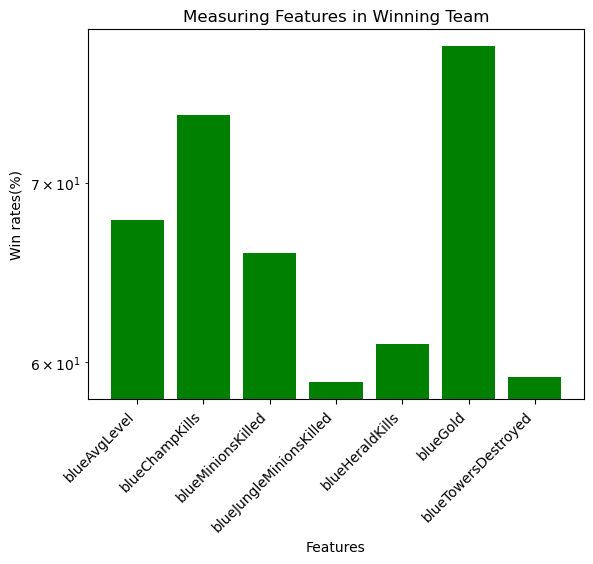

In [88]:
plt.bar(x, y, color='green')

# Set plot labels
plt.xlabel('Features')
plt.ylabel('Win rates(%)')
plt.title('Measuring Features in Winning Team')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()
